# Feature Engeneering

Dans cettte partie il sera question de : 
- Lister les package à utiliser et exploration de la base de données.  
- Convertir les données en type approprié comme dans l'analyse précedente.
- Faire le traitement des données manquantes comme dans le cas précedent et justifier l'approche utilisée
- Création de nouvelle variable par discrétisation 
- Faire la mise en échelle des données quantitatives et l'encodage des données qualitatives et expliquer l'approche utilisée et le choix de cette approche. 
- Faire la selection des features les plus pertinantes du modèle.

## 0. Importation des package et exploration de la base de données. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 
%matplotlib inline 

# pas de warning
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, KBinsDiscretizer, MultiLabelBinarizer

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max.columns', df.shape[1])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Informations sur la base de données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Suppression de la colonne des identifiants des clients

In [4]:
df = df.drop(columns=["customerID"], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Liste des variables catégorielles

In [5]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].unique()}')

gender-------------------------------------------- ['Female' 'Male']
Partner------------------------------------------- ['Yes' 'No']
Dependents---------------------------------------- ['No' 'Yes']
PhoneService-------------------------------------- ['No' 'Yes']
MultipleLines------------------------------------- ['No phone service' 'No' 'Yes']
InternetService----------------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity------------------------------------ ['No' 'Yes' 'No internet service']
OnlineBackup-------------------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection---------------------------------- ['No' 'Yes' 'No internet service']
TechSupport--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingTV--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingMovies----------------------------------- ['No' 'Yes' 'No internet service']
Contract------------------------------------------ ['Month-to-

## 2. Transformation des variables en type approprié 

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].dtype

dtype('float64')

Conversion de la variable citoyen d'age mûr en variable catégorielle 

In [7]:
df["SeniorCitizen"].replace(to_replace=[0, 1], value=["No", "Yes"], inplace=True) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## 3. Traitement des données manquantes 


Comme cela a été mentionnée dans l'analyse univariée de l'EDA, les données manquantes de la variable frais totaux sont `MAR` car les données manquantes de cette variable dépendent principalement de la variable `tenure` ce qui voudrait dire que l'on n'a pas encore comptabilisé le total des charges des nouveaux clients. Et de ce fait, nous allons utiliser les deux méthodes d'imputation `KNN` et la `regression`.

In [9]:
df[["TotalCharges"]] = KNNImputer(n_neighbors=3).fit_transform(df[["TotalCharges"]])

In [10]:
df.isna().sum()/df.shape[0]*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

**Répartition de la variable à prédire**

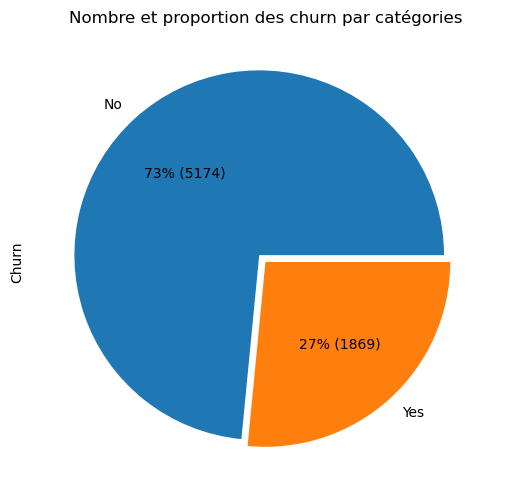

In [11]:
#calculer la proportion et le nombre de chaque catégorie
#calcul de la proportion de chaque catégorie
prop = df["Churn"].value_counts().reset_index()
prop.columns = ["Churn", "proportion"]

#graphique en secteur pour les frequences de chaque catégorie
plt.figure(figsize = (8, 6))
ax = df["Churn"].value_counts().plot(kind = "pie", explode = (0.05,0), autopct = lambda x: f'{x:.0f}% ({x/100*len(df):.0f})')

#ajustement du titre
plt.title("Nombre et proportion des churn par catégories");

Les proportions de la variable cible ne sont pas homogènes et donc on peut affirmer que nos classe ne sont pas équilibrées pour ce problème. On a $73\%$ de clients qui se sont désabonnés et $27\%$ qui sont restés fidèles à l'entreprise. Dans l'estimation du modèle, on devra utiliser des métriques comme le `f1-score`, la sensiblité. 

## 4. Création de nouvelle variable par discrétisation 

La discrétisation consiste à transformer une variable quantitative en qualitative ordinale, en la découpant en classes (intervalles). La discrétisation fait partie du processus d’apprentissage, de sa qualité dépend la qualité du modèle élaboré à partir des données transformées. 

#### Pourquoi utiliser la discrétisation sur variable quantitative ?

- Cela modifie les caractéristiques des données pour rendre les algorithmes de statistiques et de machine learning plus efficaces par exemple, corriger les distributions très asymétriques, atténuer le rôles des points aberrants.  Deux questions clés se posent : combien d’intervalles, comment déterminer les bornes (seuils) de découpage.

En se basant sur les connaissances du domaine, l'on peut proposer le découpage le plus adapté au problème posé. La majorité des cas, on défini un critère possible de découpage par rapport à l’analyse à mettre en place. Il est donc necessaire de mettre en place une solution guidée par les caractéristiques des données. 

#### Comment s’appuyer sur ces informations pour produire un découpage qui tient la route ?

Il existe, plusieurs méthode, mais ici, nous ne nous attarderons que sur une méthode usuelle la plus utilisée. Il s'agit de la méthode des intervalle de largeur égale dans laquelle on définie un nombre d'intervalle fixe et on construit des intervalles d'amplitudes égales.

#### Avantage
- Rapidité de calcul et simplicité (facile à expliquer) 
- Ne modifie pas la forme de la distribution des données. 

#### Inconvéniants
- Choix de $k$ arbitraire, pas toujours évident
- Sensibilité aux points extrêmes (min ou max)
- Possibilité d’avoir des intervalles avec très peu d’individus voire vides

#### Autres méthodes usuelles couramment utilisées

- **Moyennes emboîtées :**  On découpe avec la moyenne. Puis, de part et d’autre de ce premier seuil, on découpe avec les moyennes locales respectives. le nombre de classes sera forcément une puissance de $2$.
- **Grandes différences relatives :** On trie les données de manière croissante. On repère les grands écarts entre $2$ valeurs successives. On découpe si $(écart > seuil)$ exprimé en $\%$ de l’écart-type des valeurs (ou en $\%$ du MAD (median absolute deviation), si l’on souhaite se prémunir du problème des valeurs aberrantes).

- **Ecart à la moyenne :** $k$ fixé. Si $k$ est pair, de part et d’autre de la moyenne, les premiers intervalles sont de largeur $\sigma$ où $\sigma\times m$ est un paramètre. jusqu’à ce qu’on ait $k$ intervalles en tout [les derniers intervalles en queue de distribution ont une largeur différente]. Si $k$ est impair, le premier intervalle est à cheval autour de la moyenne.


Dans le cas de notre base de données, nous allons utiliser la méthode des intervalle de largeur pour créer une nouvelle variable à partir de la variable `tenure`. A partir de là, on pourra définir le nombre de mois à partir du quel un individu pourra être considérer comme nouveau client ou non. 

Nous allons créer une nouvelle variable. Ceux qui auront moins d'un an d'anciéneté dans l'entreprise seront considérés comme des nouveaux clients

In [12]:
#Nous construisons un tableau de cases avec une valeur minimale et une valeur maximale
bin = np.linspace(min(df['tenure']), max(df["tenure"]), 7)
bin 

array([ 0., 12., 24., 36., 48., 60., 72.])

Nous allons créer 6 groupes de modalités différentes par rapport à la variable liée à l'ancienneté dans l'entreprise : 
- `New_subscrib` correspond aux nouveaux abonnées dans l'entreprise
- `two_year_subscrib` correspond aux clients ayant $2$ ans d'abonnement dans l'entreprise
- `three_year_subscrib` correspond aux clients ayant $3$ ans d'abonnement dans l'entreprise
- `four_year_subscrib` correspond aux clients ayant $4$ ans d'abonnement dans l'entreprise
- `five_year_subscrib` correspond aux clients ayant $5$ ans d'abonnement dans l'entreprise
- `six_year_subscrib` correspond aux clients ayant $6$ ans d'abonnement dans l'entreprise

In [13]:
#definition des groupe
group_name = ["New_subscrib", "two_year_subscrib", "three_year_subscrib", "four_year_subscrib", "five_year_subscrib", "six_year_subscrib"]

#creation d'une variable à partir de la fonction cut
df["seniority_company"] = pd.cut(x=df["tenure"], bins = bin, labels=group_name, include_lowest=True)
df[["seniority_company", "tenure"]].head()

,seniority_company,tenure
0,New_subscrib,1
1,three_year_subscrib,34
2,New_subscrib,2
3,four_year_subscrib,45
4,New_subscrib,2


In [14]:
df["seniority_company"].value_counts()

New_subscrib           2186
six_year_subscrib      1407
two_year_subscrib      1024
three_year_subscrib     832
five_year_subscrib      832
four_year_subscrib      762
Name: seniority_company, dtype: int64

In [15]:
#clients qui se sont désabonnés par rapport à leur anciénneté
df[df["Churn"]=="Yes"]["seniority_company"].value_counts()

New_subscrib           1037
two_year_subscrib       294
three_year_subscrib     180
four_year_subscrib      145
five_year_subscrib      120
six_year_subscrib        93
Name: seniority_company, dtype: int64

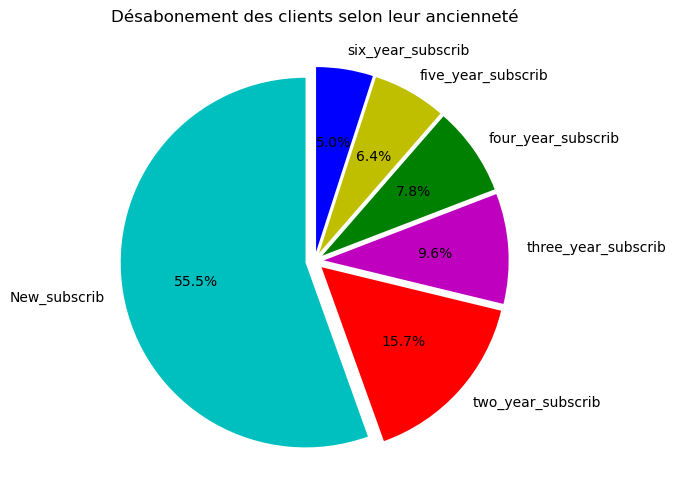

In [16]:
seniority = df[df["Churn"]=="Yes"]["seniority_company"].value_counts()
seniority = [seniority[0]/sum(seniority)*100, seniority[1]/sum(seniority)*100, seniority[2]/sum(seniority)*100, 
             seniority[3]/sum(seniority)*100, seniority[4]/sum(seniority)*100, seniority[5]/sum(seniority)*100]

#representation graphique
plt.figure(figsize=(10, 6))
plt.pie(seniority, 
        labels=["New_subscrib", "two_year_subscrib", "three_year_subscrib", 
                "four_year_subscrib", "five_year_subscrib", "six_year_subscrib"], 
        autopct="%1.1f%%", 
        startangle=90, 
        explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05),
        colors=["c", "r", "m", "g", "y", "b"])
plt.title("Désabonement des clients selon leur ancienneté");

Clients qui se sont le plus désabonnés par rapport à leur anciénneté:
- $55,5\%$ étaient des nouveaux clients
- $15,7\%$ sont des clients qui se sont désabonnés après $2$ ans
- $9,6\%$ sont des clients qui se sont désabonnés après $3$ ans
- $7,8\%$ sont les clients qui se sont désabonnés après $4$ ans 
- $6,4\%$ sont les clients qui se sont désabonnés après $5$ ans 
- $5\%$ sont des clients qui se sont désabonnés après $6$ ans 

**Etude de la relation entre l'ancienneté des clients et leur désabonnement**

Il est important de voir si la variable nouvellement créer à un effet significatif sur la variable `Churn` et si cette variable à un effet sur la variable `tenure` pou éviter tout risque de multicolinéarité dans le modèle. Cela revient à évaluer si l'ancienneté peut être l'une des variables à l'origine du `churn` des clients dans l'entreprise. Pour ce fait, nous allons étudier la liaison entre la variable `Churn`et la variable `seniority_company` en utilisant la statistique de khi-deux et mesurer l'intensité de liaison entre ces deux variables en utilisant la statistique de Cramer-V. 

In [17]:
# Calcul de chi deux sur la base de données
from scipy.stats import chi2_contingency
import scipy.stats as st

def tests_varqual(data1, data2):
    
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(data1, data2)
    
    # Effectuer le test du chi-carré
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    # Afficher les résultats
    print("Statistique du chi-carré :", chi2_stat)
    print("P-valeur :", p_value)
    print("Degrés de liberté :", dof)
    
    
    # Calculer le coefficient de Cramér-V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))

    # Afficher le coefficient de Cramér-V
    print("Coefficient de Cramér-V :", cramer_v)
    print("\n")

In [18]:
tests_varqual(df['seniority_company'], df['Churn'])

Statistique du chi-carré : 873.8577602525022
P-valeur : 1.209674165469595e-186
Degrés de liberté : 5
Coefficient de Cramér-V : 0.35224231722345734




Le resultats produit par les tests montrent que l'ancienneté des clients à une influence significative sur leur désabonnement de plus l'intensité de la liaison entre ces deux variables est bonne (coef de cramer>$0,3$). On peut conclure que la variable  `seniority_company` sera importante dans l'explication du `Churn` des clients dans l'entreprise. 

**Création d'une variable liée au nombre de service auxquels le client a souscrit dans l'entreprise**

In [19]:
#variables liées au service de l'entreprise
df1 = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'DeviceProtection', 'OnlineBackup', 'TechSupport', 'StreamingMovies',
    'StreamingTV']]
df1.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,OnlineBackup,TechSupport,StreamingMovies,StreamingTV
0,No,No phone service,DSL,No,No,Yes,No,No,No
1,Yes,No,DSL,Yes,Yes,No,No,No,No
2,Yes,No,DSL,Yes,No,Yes,No,No,No
3,No,No phone service,DSL,Yes,Yes,No,Yes,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No


In [20]:
numbr = []
for k in np.arange(1, df1.shape[0]+1):
    cpt = 0
    for i in np.arange(df1.shape[1]):
        if (df1.iloc[k-1:k, i].values=='Yes'):
            cpt = cpt+1
    numbr+=[cpt]

print(numbr)


[1, 3, 3, 3, 1, 5, 4, 1, 6, 3, 2, 1, 5, 6, 6, 8, 1, 6, 3, 4, 2, 1, 1, 4, 4, 3, 5, 1, 8, 3, 6, 4, 5, 1, 1, 6, 1, 2, 6, 5, 2, 5, 1, 7, 6, 3, 2, 2, 6, 5, 4, 5, 5, 3, 6, 4, 5, 7, 2, 6, 5, 4, 3, 3, 4, 5, 3, 6, 1, 3, 2, 1, 7, 2, 4, 7, 2, 3, 5, 2, 2, 3, 2, 6, 1, 5, 3, 1, 1, 1, 3, 2, 7, 7, 6, 3, 5, 1, 1, 5, 1, 1, 5, 3, 7, 0, 6, 1, 4, 1, 5, 4, 4, 2, 4, 4, 1, 5, 1, 4, 5, 1, 2, 2, 1, 4, 3, 2, 1, 4, 3, 5, 2, 1, 1, 2, 2, 1, 1, 1, 8, 5, 5, 4, 2, 6, 1, 1, 4, 5, 4, 4, 7, 7, 1, 2, 3, 1, 4, 2, 3, 3, 1, 6, 1, 1, 1, 8, 3, 1, 4, 6, 6, 4, 1, 2, 2, 2, 6, 1, 1, 1, 3, 5, 3, 0, 2, 1, 1, 3, 5, 4, 1, 7, 1, 5, 2, 7, 7, 1, 5, 3, 6, 2, 1, 3, 5, 2, 6, 6, 1, 0, 1, 1, 3, 5, 4, 5, 7, 2, 1, 2, 1, 2, 1, 3, 6, 2, 4, 7, 7, 5, 3, 1, 2, 3, 1, 2, 4, 1, 7, 7, 5, 5, 3, 2, 4, 2, 2, 6, 5, 1, 2, 7, 1, 5, 8, 8, 1, 3, 2, 6, 4, 4, 8, 8, 2, 6, 1, 2, 4, 4, 0, 6, 1, 4, 6, 4, 4, 2, 3, 2, 2, 3, 4, 2, 1, 1, 2, 1, 2, 4, 4, 3, 1, 1, 2, 5, 5, 2, 3, 4, 4, 5, 3, 2, 2, 5, 5, 6, 1, 4, 8, 1, 2, 7, 1, 6, 4, 4, 7, 5, 1, 2, 5, 6, 3, 1, 1, 3, 1, 1, 5, 

In [21]:
df = df.assign(NumberServices = numbr)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,seniority_company,NumberServices
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New_subscrib,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,three_year_subscrib,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New_subscrib,3
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,four_year_subscrib,3
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New_subscrib,1


In [22]:
#tranformation de la variable en variable catégorielle 
df['NumberServices'] = df['NumberServices'].astype('object')
df['NumberServices'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: NumberServices
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


**Etude de la relation entre la nouvelle variable nombre de service auxquels le client à souscrit dans l'entreprise**

In [23]:
df['NumberServices'].value_counts()

1    1701
2    1188
3     965
4     922
5     908
6     676
7     395
8     208
0      80
Name: NumberServices, dtype: int64

In [24]:
#clients qui se sont désabonnés par rapport au nombre de service souscrit
df[df["Churn"]=='Yes']["NumberServices"].value_counts()

2    390
1    359
3    352
4    289
5    232
6    152
7     49
0     35
8     11
Name: NumberServices, dtype: int64

In [25]:
tests_varqual(df['NumberServices'], df['Churn'])

Statistique du chi-carré : 216.6429045702822
P-valeur : 1.970904567298619e-42
Degrés de liberté : 8
Coefficient de Cramér-V : 0.17538538104870713




## 4. Data Scaling

### Normalisation et Standardisation

En machine learning, il est souvent nécessaire de normaliser ou de standardiser les données pour améliorer les performances des modèles. Ces deux techniques permettent de mettre les données à une échelle commune et de faciliter l'apprentissage des algorithmes.

### Normalisation

### MinMax scaler

La normalisation min max consiste à mettre les données à l'échelle entre 0 et 1. Cela se fait en soustrayant la valeur minimale de chaque point de données et en divisant par la différence entre la valeur maximale et la valeur minimale. La formule mathématique de la normalisation est la suivante :

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

La normalisation est particulièrement utile lorsque les données ont des écarts importants entre les valeurs, par exemple dans les images ou les sons.

###  MaxAbsScaler
Le MaxAbsScaler est une technique de mise à l'échelle qui divise chaque valeur par la valeur absolue maximale de la colonne. La formule mathématique pour le MaxAbsScaler est la suivante :

$$x_{scaled} = \frac{x}{|x_{max}|}$$

Le MaxAbsScaler est utile lorsque vous voulez mettre à l'échelle les données sans déformer la distribution des données, en particulier lorsque les valeurs sont centrées autour de zéro. Par exemple, si vous avez des données qui ont une moyenne de zéro et une plage de valeurs qui va de -100 à 100, le MaxAbsScaler peut être une bonne option.



### Standardisation

### Standard Scaler

La standardisation consiste à mettre les données à l'échelle de telle sorte que la moyenne soit égale à zéro et l'écart type égal à 1. Cela se fait en soustrayant la moyenne de chaque point de données et en divisant par l'écart type. La formule mathématique de la standardisation est la suivante :

$$x_{std} = \frac{x - \mu}{\sigma}$$

La standardisation est particulièrement utile lorsque les données sont normalement distribuées.

### Robust Scaler
Le RobustScaler est un outil de standardisation qui permet de centrer les données autour de la médiane et de réduire l'effet des valeurs aberrantes en les ramenant à un certain point. Cela se fait en soustrayant la médiane de chaque point de données et en divisant par l'écart interquartile (IQR). La formule mathématique de la normalisation est la suivante :

$$x_{robust} = \frac{x - \text{médiane}(x)}{\text{IQR}(x)}$$

Le RobustScaler est particulièrement utile lorsque les données contiennent des valeurs aberrantes qui pourraient influencer la moyenne et l'écart-type dans le cas d'une StandardScaler classique. Il est également résistant aux valeurs aberrantes et peut être utilisé dans les données qui ne suivent pas une distribution normale.


### Comment choisir entre la normalisation et la standardisation

Le choix entre la normalisation et la standardisation dépend des données et du modèle utilisé. En général, la normalisation est utilisée pour les données qui ont des écarts importants entre les valeurs, tandis que la standardisation est utilisée pour les données qui sont normalement distribuées.

Il est recommandé de tester les deux méthodes pour voir laquelle fonctionne le mieux pour un modèle donné.


| Critère | Normalisation | Standardisation |
| --- | --- | --- |
| Objectif | Mettre les valeurs dans un intervalle borné | Centrer les valeurs autour de 0 et réduire l'échelle |
| Formule | (x - min) / (max - min) | (x - moyenne) / écart-type |
| Plage de sortie | [0, 1] | Potentiellement sans bornes |
| Sensibilité aux valeurs aberrantes | Sensible : les valeurs extrêmes ont un impact sur la plage de sortie | Moins sensible : les valeurs extrêmes sont réduites à un certain point |
| Interprétation | Les valeurs normalisées sont plus facilement interprétables, car elles sont mises à l'échelle d'une plage spécifique | Les valeurs standardisées sont centrées autour de 0 et leur échelle est déterminée par l'écart-type, ce qui les rend moins interprétables |
| Utilisation | Pour les algorithmes qui requièrent des données sur une plage bornée, tels que les réseaux de neurones et les algorithmes de clustering basés sur la distance | Pour les algorithmes qui requièrent des données centrées autour de 0 et avec une échelle comparable, tels que la régression linéaire et les SVM |
| Exemples d'algorithmes | MinMaxScaler, MaxAbsScaler | StandardScaler, RobustScaler |


La normalisation est particulièrement utile lorsque les données ne sont pas normalement distribuées et lorsque dans nos données, on n'a pas de valeurs abbérentes. L'analyse de la distrution des variables numériques dans l'EDA nous ont montré que ces données numériques ne sont pas distribuées suivant la loi normale. L'une des raison pour lesquels nous utilisons cette méthode et plus particulièrement `MinMaxScaler` dans cette analyse est que nous n'avons pas de valeurs abbérentes dans nos données. 


In [26]:
num_col = ["tenure", "MonthlyCharges", "TotalCharges"]
mm = MinMaxScaler()
mm_result = mm.fit_transform(df[num_col])
df_mm= pd.DataFrame(mm_result, columns=num_col)
print("Standard Scaler : ")
print(df_mm)

Standard Scaler : 
        tenure  MonthlyCharges  TotalCharges
0     0.013889        0.115423      0.001275
1     0.472222        0.385075      0.215867
2     0.027778        0.354229      0.010310
3     0.625000        0.239303      0.210241
4     0.027778        0.521891      0.015330
...        ...             ...           ...
7038  0.333333        0.662189      0.227521
7039  1.000000        0.845274      0.847461
7040  0.152778        0.112935      0.037809
7041  0.055556        0.558706      0.033210
7042  0.916667        0.869652      0.787641

[7043 rows x 3 columns]


# Encoding des variables catégorielles

| Forme d'encodage | Définition | Avantages | Inconvénients | Conditions d'utilisation |
| --- | --- | --- | --- | --- |
| Label Encoding | Transformation des valeurs catégorielles en entiers | Facile à implémenter, adapté aux algorithmes de machine learning | Création d'une relation d'ordre artificielle entre les catégories, peut induire en erreur certains algorithmes | Les catégories doivent être ordonnées ou ne pas avoir de relation d'ordre |
| One-Hot Encoding | Transformation des valeurs catégorielles en vecteurs binaires | Ne crée pas de relation d'ordre artificielle, adapté à de nombreux algorithmes de machine learning | Peut créer des colonnes redondantes et augmenter considérablement la taille des données | Les catégories ne doivent pas être trop nombreuses |
| ordinal Encoding | Le codage ordinal est utilisé lorsque les catégories d'une variable ont un ordre naturel | Importante dans le cas ou il existe des relations d'ordre dans la variable à encoder| Elle Crée des relations d'odre d'un point de vu arithmetique dans la mesure ou les catégories des variables ne sont pas ordinale et cela risque de pénaliser la plus part des modèle de machine learning | Utile pour les modèles qui ne sont pas sensible aux relations d'ordre dans les données qu'on leur présentent comme les arbres de décisions|

### Label Encoding

Le Label Encoding est une technique de transformation de variables catégorielles en valeurs numériques ordinales. Chaque catégorie possible de la variable est remplacée par un entier unique, en fonction de l'ordre dans lequel les catégories apparaissent dans la variable.

### Avantages

Le Label Encoding présente plusieurs avantages :

- Il est simple à mettre en œuvre et ne nécessite pas beaucoup de ressources.
- Il préserve l'ordre des catégories si elle est importante pour l'analyse.

### Inconvénients

Le Label Encoding présente également quelques inconvénients :

- Il crée une relation d'ordre artificielle entre les catégories.
- Il n'est pas adapté à certains algorithmes de machine learning, tels que les réseaux de neurones et les machines à vecteurs de support, qui peuvent interpréter les valeurs numériques comme des valeurs continues plutôt que des catégories.

### Conditions d'utilisation

Le Label Encoding est adapté aux variables catégorielles qui ont une relation d'ordre naturelle et pour lesquelles l'interprétation en termes de valeurs numériques est pertinente. Cependant, il est important de prendre en compte les avantages, les inconvénients et les conditions d'utilisation de cette technique pour éviter des erreurs d'interprétation ou des problèmes d'analyse. 

En général, le Label Encoding est une technique simple et rapide pour encoder des variables catégorielles en valeurs numériques ordinales, mais il est important de bien comprendre ses limites et d'utiliser d'autres techniques d'encodage pour des analyses plus avancées ou pour des algorithmes de machine learning plus complexes.

Nous allons utiliser `LabelEncoder()` pour encoder la variable `Churn` en variable numérique binaire pour que celle ci puisse être pris en compte par notre modèle. 

In [27]:
# Label encoding
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
print("Label encoding : ")
print(df[['Churn']].value_counts(normalize=True))

Label encoding : 
Churn
0        0.73463
1        0.26537
dtype: float64


### Target Encoding

Le Target Encoding est une technique de transformation de variables catégorielles en valeurs numériques en fonction de la variable cible. Chaque catégorie possible de la variable est remplacée par la moyenne, la médiane ou tout autre agrégat de la variable cible pour cette catégorie.

### Avantages

Le Target Encoding présente plusieurs avantages :

- Il peut capturer des informations importantes sur la relation entre la variable catégorielle et la variable cible.
- Il peut être adapté à des variables catégorielles avec un grand nombre de catégories ou des catégories rares.

### Inconvénients

Le Target Encoding présente également quelques inconvénients :

- Il peut être sensible aux valeurs aberrantes et aux échantillons de petite taille.
- Il peut surajuster les données d'entraînement s'il n'est pas utilisé avec prudence.

### Conditions d'utilisation

Le Target Encoding est adapté aux variables catégorielles pour lesquelles la relation avec la variable cible est importante pour l'analyse ou la prédiction. Il est important de prendre en compte les avantages et les inconvénients de cette technique pour éviter des erreurs d'interprétation ou des problèmes d'analyse.

En général, le Target Encoding est une technique utile pour encoder des variables catégorielles en valeurs numériques en fonction de la variable cible, mais il est important de bien comprendre ses limites et d'utiliser d'autres techniques d'encodage pour des analyses plus avancées ou pour des algorithmes de machine learning plus complexes.

### One-Hot Encoding

Le One-Hot Encoding est une technique de transformation de variables catégorielles en vecteurs binaires. Chaque catégorie possible de la variable est représentée par une colonne binaire, et chaque observation est représentée par un vecteur binaire de la même dimension que le nombre de catégories possibles.

### Avantages

Le One-Hot Encoding présente plusieurs avantages :

- Il ne crée pas de relation d'ordre artificielle entre les catégories.
- Il est adapté à de nombreux algorithmes de machine learning, tels que les réseaux de neurones, les arbres de décision et les machines à vecteurs de support.
- Il permet de prendre en compte des variables catégorielles avec un grand nombre de catégories.

### Inconvénients

Le One-Hot Encoding présente également quelques inconvénients :

- Il peut créer des colonnes redondantes si une variable catégorielle a un grand nombre de catégories.
- Il peut augmenter considérablement la taille des données si plusieurs variables catégorielles sont encodées de cette manière.

### Conditions d'utilisation

Le One-Hot Encoding est adapté aux variables catégorielles qui ne sont pas ordonnées et qui ont un nombre raisonnable de catégories possibles. Si une variable catégorielle a un grand nombre de catégories, il peut être préférable d'utiliser d'autres techniques d'encodage, telles que le Target Encoding ou le Binary Encoding.

En général, le One-Hot Encoding est une technique efficace pour encoder des variables catégorielles. Cependant, il est important de prendre en compte les avantages, les inconvénients et les conditions d'utilisation de cette technique pour éviter des problèmes de dimensionnalité ou des erreurs d'interprétation.


Dans notre analyse, nous allons utilisé le one Hot Encoding car elle developpe un espace des entités (dimensionnalité) dans le jeu de données en ajoutant des variables factices (dummy).

In [28]:
# One-hot encoding
cat_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'seniority_company', 'NumberServices']
ohe = OneHotEncoder(sparse=False)
ohe_result = ohe.fit_transform(df[cat_col])
df_ohe= pd.DataFrame(ohe_result, columns=ohe.get_feature_names(cat_col))
print("One-hot encoding : ")
print(df_ohe)

One-hot encoding : 
      gender_Female  gender_Male  SeniorCitizen_No  SeniorCitizen_Yes  \
0               1.0          0.0               1.0                0.0   
1               0.0          1.0               1.0                0.0   
2               0.0          1.0               1.0                0.0   
3               0.0          1.0               1.0                0.0   
4               1.0          0.0               1.0                0.0   
...             ...          ...               ...                ...   
7038            0.0          1.0               1.0                0.0   
7039            1.0          0.0               1.0                0.0   
7040            1.0          0.0               1.0                0.0   
7041            0.0          1.0               0.0                1.0   
7042            0.0          1.0               1.0                0.0   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0            0.0      

In [29]:
df1 = pd.concat([df_mm, df_ohe], axis=1)

In [30]:
pd.set_option("display.max.columns", df1.shape[0])
df1.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,seniority_company_New_subscrib,seniority_company_five_year_subscrib,seniority_company_four_year_subscrib,seniority_company_six_year_subscrib,seniority_company_three_year_subscrib,seniority_company_two_year_subscrib,NumberServices_0,NumberServices_1,NumberServices_2,NumberServices_3,NumberServices_4,NumberServices_5,NumberServices_6,NumberServices_7,NumberServices_8
0,0.013889,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.472222,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.027778,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.625000,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.027778,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 7. Feature selecton 

Pou choisir les variables à introduire dans modèle, dans la littérature, nous avons plusieurs approches: 
- L'approche manuelle qui consiste à receuillir l'approche des expets, faire une révue de la littérature pour pouvoir choisir les variables les plus pertinentes qui entrerons dans le modèle. Suivant cette approche, on ne conserve que les variables qui sont suffisamment bien renseignées c'est à dire, des variables donc la proportion des valeurs manquantes ne doit pas dépasser le seuil de $30\%$.
- L'approche statistique, ou par filtrage qui permet de choisir les variables les plus pertinentes suivant certaines règle (comme la règle du coude)


#### Listes des méthodes de filtrage 

Les méthodes de sélection de variables par filtrage (filter methods) évaluent la pertinence des variables en fonction de leurs propriétés statistiques, sans tenir compte du modèle de machine learning spécifique. Voici quelques méthodes de filtrage couramment utilisées pour la sélection des variables :

**Corrélation de Pearson** : Cette méthode mesure la corrélation linéaire entre chaque variable et la variable cible. Les variables ayant une corrélation élevée (positive ou négative) sont considérées comme pertinentes.


**Chi-carré (Chi-squared)** : Le test du chi-carré est utilisé pour déterminer si une relation significative existe entre deux variables catégorielles. Il est couramment utilisé pour la sélection de caractéristiques lorsque les variables d'entrée et la variable cible sont toutes deux catégorielles.

**Coefficient de corrélation de Cramer** : Le coefficient de corrélation de Cramer est une mesure de la force de l'association entre deux variables catégorielles. Il peut être utilisé pour mesurer la relation entre deux variables catégorielles, comme la taille et la couleur, ou la marque et la couleur d'un produit. Le coefficient de corrélation de Cramer varie de 0 à 1, où 0 indique une absence d'association et 1 indique une association parfaite.

**ANOVA (Analyse de la variance)** : L'ANOVA est utilisée pour déterminer si les moyennes de plusieurs groupes sont égales. Dans la sélection de caractéristiques, l'ANOVA est souvent utilisée pour comparer les moyennes des groupes formés en fonction de la variable cible pour chaque variable d'entrée.

**Test de Kruskal-Wallis** : Le test de Kruskal-Wallis est une alternative non paramétrique à l'ANOVA qui teste si plusieurs groupes ont la même distribution. Il est utile pour la sélection de caractéristiques lorsque les données ne satisfont pas aux hypothèses de l'ANOVA (par exemple, lorsque les données ne sont pas normalement distribuées).

**Variance**: La sélection de variables basée sur la variance consiste à choisir les variables dont la variance est supérieure à un certain seuil. Les variables ayant une faible variance sont considérées comme moins informatives car elles ne varient pas beaucoup entre les observations.

**Corrélation de Pearson** : Cette méthode mesure la corrélation linéaire entre deux variables continues. Elle peut être utilisée pour déterminer si deux variables sont liées et dans quelle mesure elles varient ensemble. La corrélation de Pearson peut être utilisée pour évaluer la relation entre une variable indépendante et une variable dépendante.

**Test de Wilcoxon** : Le test de Wilcoxon est une méthode non paramétrique utilisée pour tester si deux échantillons indépendants ont la même distribution. Il peut être utilisé pour comparer les différences entre les variables continues de deux groupes. Le test de Wilcoxon est souvent utilisé dans les études cliniques pour évaluer les effets de traitements ou de thérapies sur une variable mesurée chez des patients.

**Information Value (IV)** : L'Information Value est une mesure utilisée pour évaluer la capacité d'une variable à prédire la variable cible dans le contexte des modèles de régression logistique. Elle est basée sur les rapports de cotes (Odds Ratios) et le concept de Weight of Evidence (WOE).

#### Selection basée sur la variance

Lorsqu'on fait un modèle de machine learning, on doit se rassurer que les variables que l'on choisit on une bonne variance parce que s'il y'a un cas de variabilité, cela suppose que les variables ne discriminent pas bien le phénomène que l'on cherche à étudier. Cela voudrait dire que si la variance d'une variable est null, ce qui voudrait dire que cette variable n'est pas explicative. 
- Première étape, on va se baser sur un critère de variance à l'image des variables qui n'ont pas une bonne variance. Le but de cette méthode consiste donc à calculer les variance des variables, et à les représentés graphiquement. 
- Deuxième étape, on choisit un seuil à partir duquel l'on va considérer que la variance d'une variable à une bonne variabilité

In [31]:
columns = df1.columns
y = df["Churn"]
columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
     

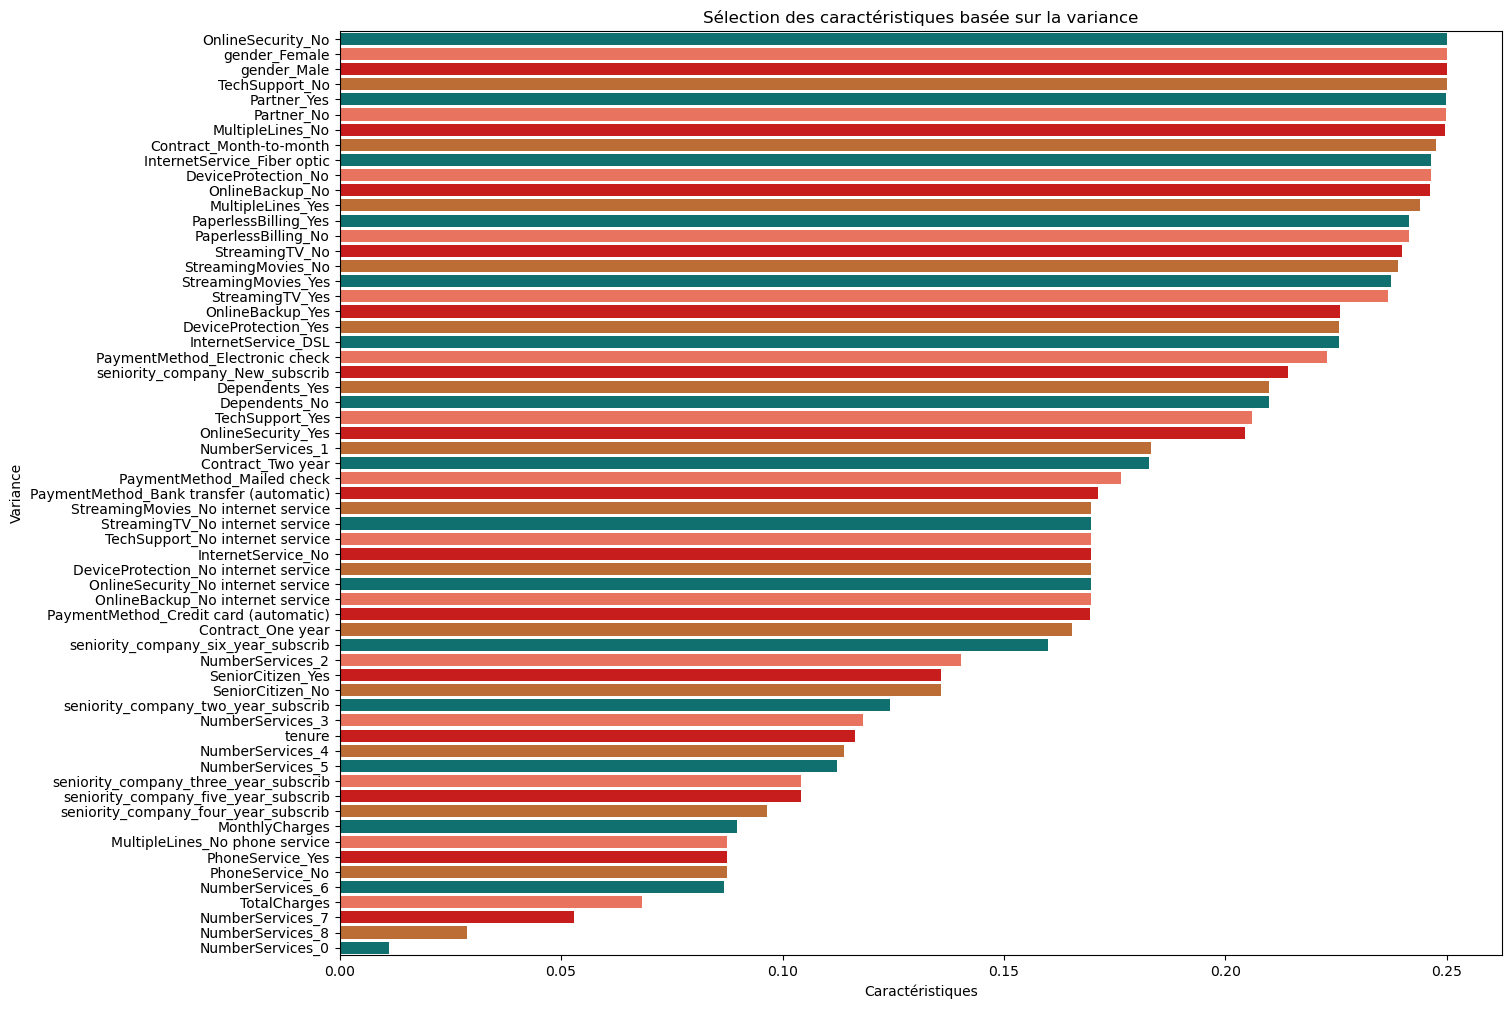

In [32]:
# Calculer la variance pour chaque caractéristique
variances = np.var(df1, axis=0)
sorted_indices = np.argsort(variances)[::-1]

# Afficher la courbe des variances
plt.figure(figsize=(15, 12))
#plt.bar(x=columns[sorted_indices], height=variances[sorted_indices])
sns.barplot(y = columns[sorted_indices], x = variances[sorted_indices], palette=['#008080','#FF6347', '#E50000', '#D2691E'], orient = 'h')
plt.xticks(rotation=0)
plt.xlabel('Caractéristiques')
plt.ylabel('Variance')
plt.title('Sélection des caractéristiques basée sur la variance');

In [33]:
from sklearn.feature_selection import VarianceThreshold
# Appliquer le seuil de variance
threshold = 0.2  # Exemple de seuil
selector = VarianceThreshold(threshold=threshold)
X_high_variance = selector.fit_transform(df1)

# Afficher les caractéristiques sélectionnées
selected_columns = columns[selector.get_support()]
print(f"Caractéristiques sélectionnées : {selected_columns}")

Caractéristiques sélectionnées : Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check', 'seniority_company_New_subscrib'],
      dtype='object')


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif 

### Sélection basée sur l'information value

L'Information Value (IV) est une mesure utilisée pour évaluer la puissance prédictive d'une variable catégorielle dans un modèle de régression binaire. L'IV est basé sur le concept de Weight of Evidence (WOE), qui est une mesure logarithmique des proportions d'événements et de non-événements pour chaque catégorie d'une variable.

### Calcul de l'Information Value

L'Information Value pour une variable est calculée en utilisant la formule suivante :

$$IV = \sum_{i=1}^n (EventDist_i - NonEventDist_i)\times WOE_i$$

où $n$ est le nombre de catégories pour la variable, $EventDist_i$ est la proportion d'événements pour la catégorie $i$, $NonEventDist_i$ est la proportion de non-événements pour la catégorie $i$, et $WOE_i$ est le Weight of Evidence pour la catégorie $i$.

Le Weight of Evidence pour une catégorie est calculé en utilisant la formule suivante :

$$WOE_i = \ln (\frac{EventDist_i}{NonEventDist_i})$$

### Interprétation de l'Information Value

L'Information Value peut être interprété comme suit :

- $IV < 0.02$ : La variable a très peu de pouvoir prédictif.
- $0.02 \leq IV < 0.1$ : La variable a un faible pouvoir prédictif.
- $0.1 \leq IV < 0.3$ : La variable a un pouvoir prédictif moyen.
- $0.3 \leq IV < 0.5$ : La variable a un pouvoir prédictif fort.
- $IV \geq 0.5$ : La variable a un pouvoir prédictif très fort, mais cela peut indiquer une fuite d'informations (data leakage) ou un problème avec les données.

En somme, l'Information Value est une mesure utilisée pour évaluer la capacité d'une variable à prédire la variable cible dans le contexte des modèles de régression logistique. Elle est basée sur les rapports de cotes (Odds Ratios) et le concept de Weight of Evidence $(WOE)$.

In [35]:
# Calculate information value
def calc_iv(df, feature, target, pr=0, epsilon=1e-6):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log((data['Distribution Good'] + epsilon) / (data['Distribution Bad'] + epsilon))
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0]

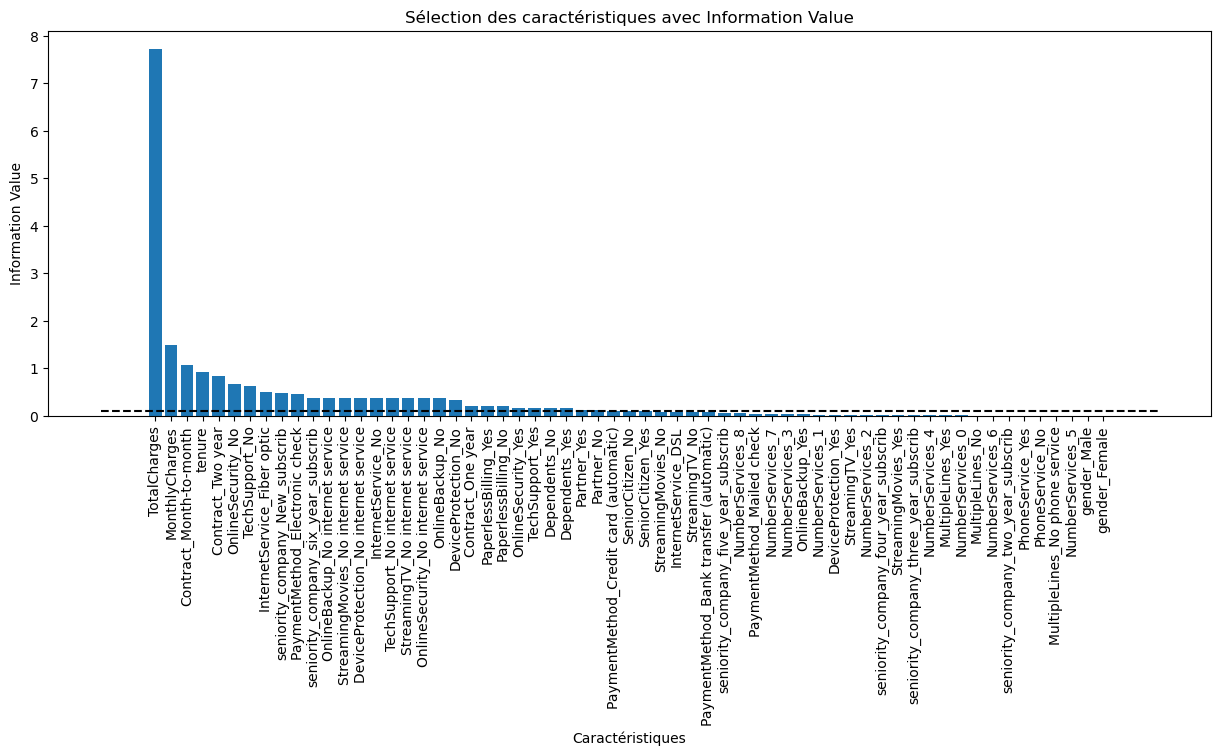

In [36]:
# Discrétiser les colonnes
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_discrete = discretizer.fit_transform(df1[columns])
df1["Churn"] = df["Churn"]

# Mettre à jour le DataFrame avec les colonnes discrétisées
df[columns] = X_discrete

# Calculer l'Information Value pour chaque caractéristique
iv_scores = np.array([calc_iv(df1, column, 'Churn') for column in columns])
sorted_indices = np.argsort(iv_scores)[::-1]

# Afficher la courbe des scores d'Information Value
plt.figure(figsize=(15, 5))
plt.bar(x=columns[sorted_indices], height=iv_scores[sorted_indices])
plt.xticks(rotation=90)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [0.1, 0.1], '--', c='k')
plt.xlabel('Caractéristiques')
plt.ylabel("Information Value")
plt.title('Sélection des caractéristiques avec Information Value');

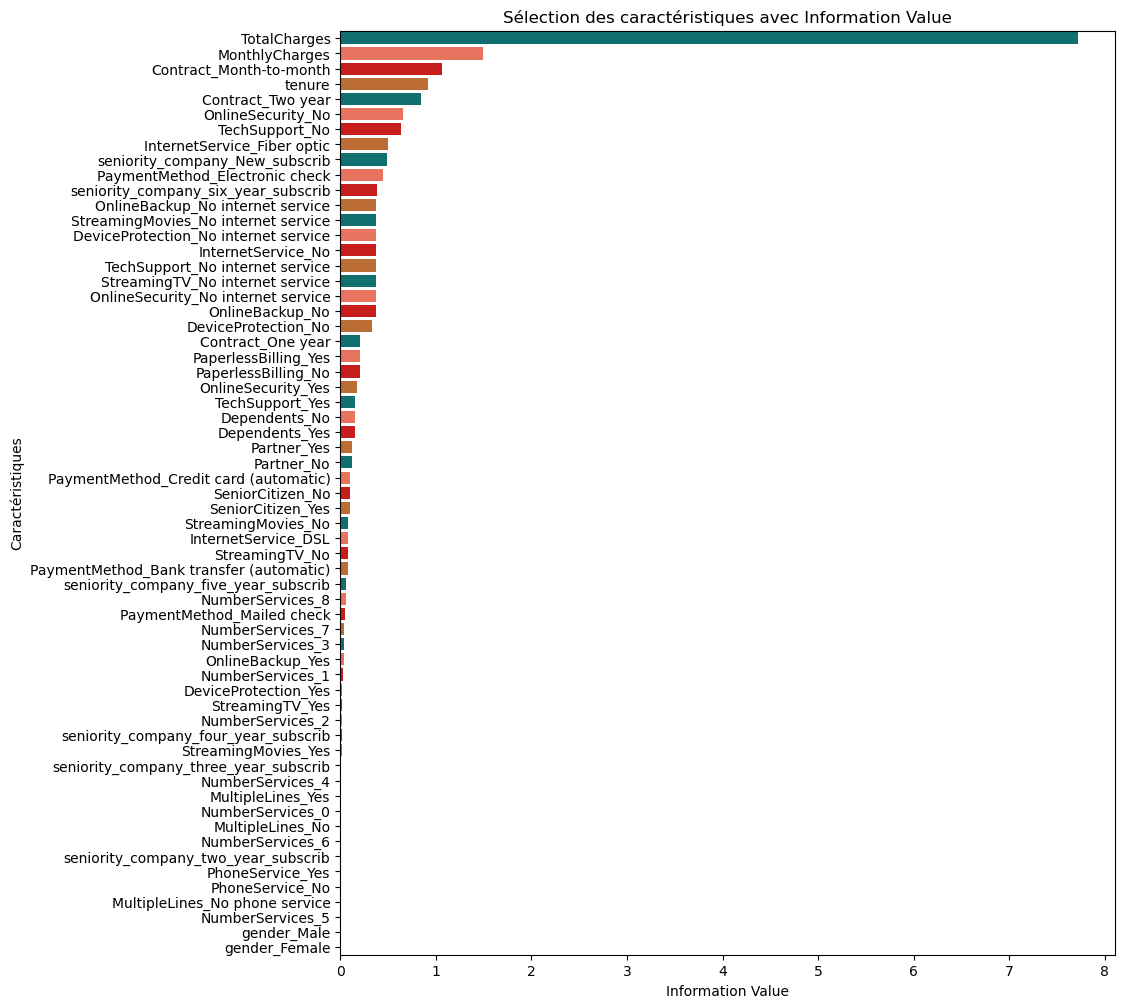

In [37]:
# Afficher la courbe des scores d'Information Value
plt.figure(figsize=(10, 12))
sns.barplot(y = columns[sorted_indices], x = iv_scores[sorted_indices], palette=['#008080','#FF6347', '#E50000', '#D2691E'], orient = 'h')
plt.xticks(rotation=0)
plt.ylabel('Caractéristiques')
plt.xlabel("Information Value")
plt.title('Sélection des caractéristiques avec Information Value');

### Feature selection with LASSO

La regression de LASSO est un processus intégré c'est à dire un modèle qui intégre déjà un modèle dans le processus de selection automatique des feature. 
La régression LASSO (Least Absolute Shrinkage and Selection Operator) est une méthode de régression linéaire régularisée qui peut être utilisée pour la sélection de variables. L'objectif de la régression LASSO est de minimiser la somme des carrés des résidus de la régression, tout en imposant une pénalité sur la somme des valeurs absolues des coefficients de régression. Cette pénalité peut conduire à une réduction de la valeur de certains coefficients à zéro, ce qui correspond à une sélection de variables.

In [38]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Lasso Regression (L1 regularization)
lasso = LassoCV(cv=5, random_state=42)
X = df1.drop(columns=['Churn'], axis=1)
y = df1['Churn']
lasso.fit(X, y)
lasso_coef = lasso.coef_

In [39]:
# Créer un tableau avec les noms des variables et les coefficients Lasso
var_names = columns[:-1]
coef_dict = {var_names[i]: lasso_coef[i] for i in range(len(var_names))}
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['Lasso Coefficient'])
print(coef_df)

                                         Lasso Coefficient
tenure                                       -4.128022e-01
MonthlyCharges                                0.000000e+00
TotalCharges                                 -6.290223e-01
gender_Female                                 2.815413e-03
gender_Male                                  -0.000000e+00
SeniorCitizen_No                             -4.653854e-02
SeniorCitizen_Yes                             2.320632e-19
Partner_No                                   -3.641009e-03
Partner_Yes                                   0.000000e+00
Dependents_No                                 1.559881e-02
Dependents_Yes                               -4.657641e-18
PhoneService_No                              -0.000000e+00
PhoneService_Yes                              0.000000e+00
MultipleLines_No                             -2.094476e-02
MultipleLines_No phone service               -0.000000e+00
MultipleLines_Yes                             4.620601e-

In [40]:
# Obtenir les caractéristiques sélectionnées par le Lasso
lasso_selected_features = np.where(lasso_coef != 0)[0]
print("Lasso-selected features:")
print(columns[lasso_selected_features])

Lasso-selected features:
Index(['tenure', 'TotalCharges', 'gender_Female', 'SeniorCitizen_No',
       'SeniorCitizen_Yes', 'Partner_No', 'Dependents_No', 'Dependents_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineBackup_No',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'seniority_company_New_subscrib',
       'seniority_company_five_year_subscrib',
       'sen

Il s'agit ici, des variables qui seront pertinent pour le modèle final selon l'approche LASSO

### Feature selection avec Random forest feature importance


Le processus de sélection de variables à l'aide de l'importance des variables de Random forest se fait selon les étapes suivante :

1. Créer un objet Random Forest avec les paramètres souhaités, tels que le nombre d'arbres et la graine aléatoire.
2. Adapter le modèle aux données.
3. Extraire les importances des variables à l'aide de l'attribut `feature_importances_`.
4. Utiliser les importances des variables pour sélectionner les variables les plus importantes à l'aide d'une méthode de sélection de variables, telle que `SelectFromModel` ou `RFECV` (recursive feature elimination with cross-validation).

In [41]:
# Random Forest feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFECV

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_feature_importances = rf.feature_importances_

# Get the Random Forest-selected features
selector = SelectFromModel(rf, prefit=True)
rf_selected_features = np.where(selector.get_support())[0]
print("Random Forest-selected features:")
print(columns[rf_selected_features])

Random Forest-selected features:
Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'TechSupport_No',
       'Contract_Month-to-month', 'PaymentMethod_Electronic check',
       'seniority_company_New_subscrib'],
      dtype='object')


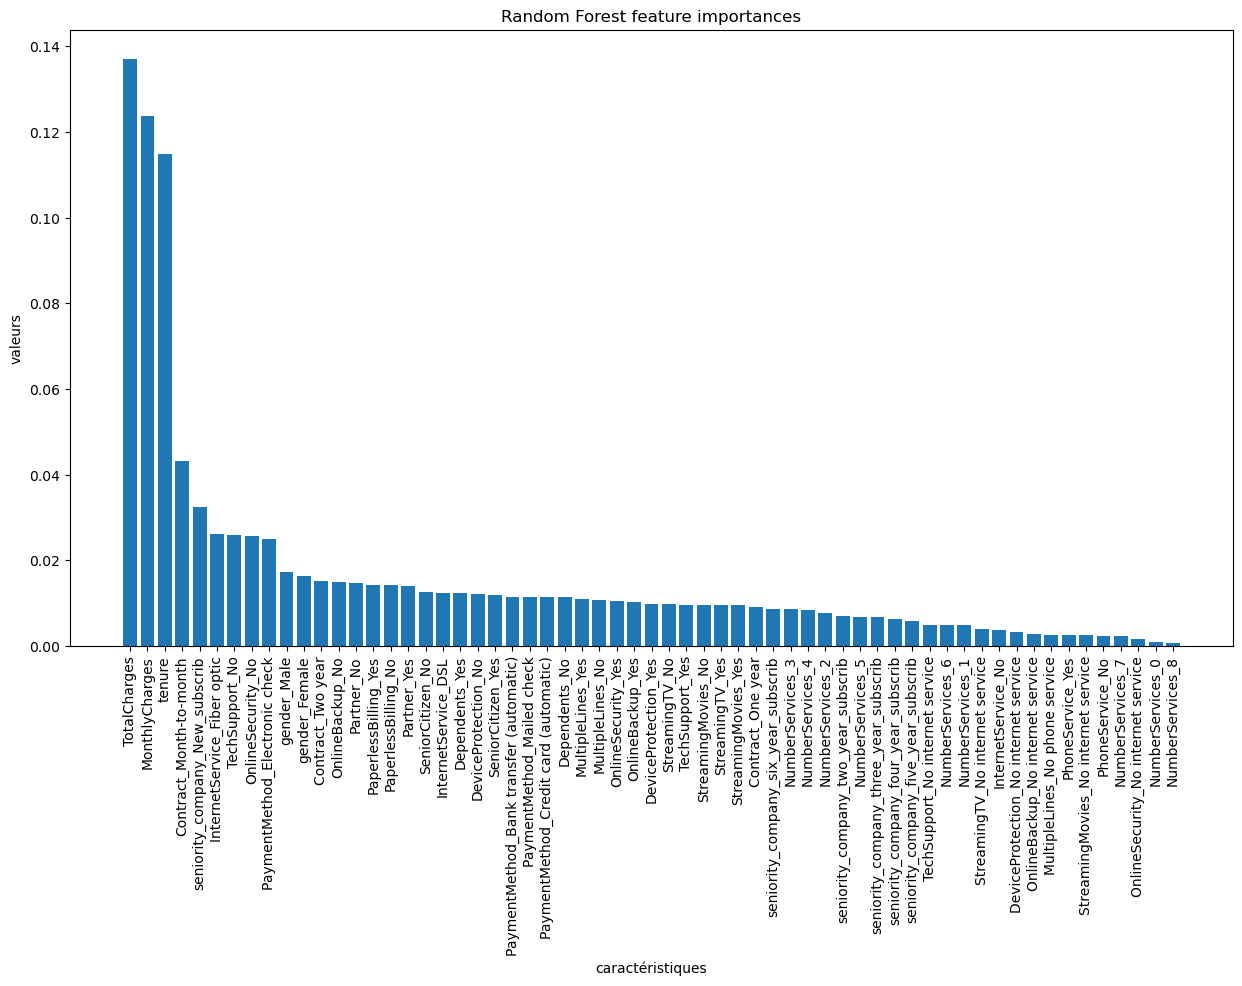

In [42]:
# Créer une liste triée des importances des caractéristiques
import matplotlib.pyplot as plt
sorted_idx = rf_feature_importances.argsort()[::-1]
sorted_rf_feature_importances = rf_feature_importances[sorted_idx]

# Créer un diagramme à barres sur l'importance des caractéristiques
plt.figure(figsize=(15, 8))
plt.bar(range(X.shape[1]), sorted_rf_feature_importances)
plt.xticks(range(X.shape[1]), columns[sorted_idx], rotation=90)
plt.ylabel("valeurs")
plt.xlabel("caractéristiques")
plt.title("Random Forest feature importances");

## Conclusion Générale

La méthode de selection selection des variables les plus pertinentes pour la modélisation retenue est celle de LASSO parce que :
1. Sur l'étude faite sur précedemment sur à l'EDA, l'hypothèse de linéarité entre la variable `Churn` et les autres variables est vérifié pour une grande partie de ces variables de la base de données. 
2. Elle minimise les résidus de la regréssion en introduisant une pénalité sur les coefficients de la regréssion et par conséquent elle selectionne les variables les plus informative pour la modélisation. 

Pour rappel des conclusions qui en ressortent de l'EDA, les variables qui ont été les variables retenues comme étant les plus informatives sur la variable `Churn` sont les suivantes : 
Parmis les modalités liées aux désabonnements on peut citer : 

Parmis les modalités liées aux désabonnements on peut citer : 

- ayant une durée de contrat mois par mois, `Contract_Month-to-month`
- les clients qui ne disposent pas de sauvegarde en ligne, `OnlineBackup_No`
- les clients qui ne disposent pas de sécurité en ligne, `OnlineSecurity_No`
- Les clients qui sont ne sont pas âgés, `SeniorCitizen_No`
- les clients qui ne disposent pas de la télévision en streaming (`StreamingTV_No`) et des films en streaming (`StreamingMovies_No`)
- les clients qui ont un fournisseur de service internet par fibre optique, `InternetService_Fiber optic`
- les clients qui ne disposent pas de support technique, `TechSupport_No`
- les clients qui ne diposent pas d'une protection de l'appareil, `DeviceProtection_No`
- les clients qui ont des modes de paiement par cheque posté, `PaymentMethod_Mailed check`, et par cheque electronique, `PaymentMethod_Electronic check`

Pour les modalités liées à la fidélité à l'entreprise :
-les clients avec les facturations dématérialisées,  `PaperlessBilling_Yes`
-les clients qui diposent de plusieurs lignes,  `MultipleLines_Yes`
- Les clients des deux sexes , `gender_Male` et `gender_Male`
- les clients avec un service téléphonique, `PhoneService_Yes`
- Les clients qui sont âgés `SeniorCitizen_No`
- Les clients qui non pas de partenaire social et non pas de partenaire social, `Partner_No` et `Partner_Yes`
- les clients qui des personnes en charge, `Dependents_Yes`
- les clients qui n'ont pas de personnes en charge, `Dependents_No`
- les clients qui ne diposent pas de plusieurs lignes, `MultipleLines_No`
- les clients qui ont des modes de paiement par carte de credit (`PaymentMethod_credit card (automatic)`) et par transfert bancaire (`PaymentMethod_bank transfert(automatic)`), 
- Les clients qui ont un partenaire social, `Partner_Yes`
- Les clients qui n'ont pas les facturations dématérialisées`PaperlessBilling_No`
- Les clients dont ayant une durée de contrat par an, `Contract_One year`
- des clients ayant une durée de contrat tout les $2$ ans, `Contract_Two year`
- les clients qui diposent d'une protection de l'appareil, `DeviceProtection_Yes`
- les clients qui disposent de sauvegarde en ligne, `OnlineBackup_Yes`
- les clients qui diposent ne disposent pas de plusieurs en lignes, `MultipleLines_No`
- les clients qui n'ont pas un service téléphonique, `PhoneService_No`
- les clients qui disposent de la télévision en streaming (`StreamingTV_Yes`) et des films en streaming (`StreamingMovies_Yes`)
- les clients qui ont un fournisseur de service internet DSL, `InternetService_DSL`
- les clients qui disposent d'un support technique, `TechSupport_Yes`
- les clients qui disposent d'une sécurité en ligne, `OnlineSecurity_Yes`

Dans le cas de la selection des features, les modalités des variables retenues suivant le critère se LASSO sont les suivantes :

- `tenure`, 
- `TotalCharges`, 
- ``seniority_company_New_subscrib`` 
- `seniority_company_five_year_subscrib`,
- `seniority_company_four_year_subscrib`,
- `seniority_company_six_year_subscrib`,
- `seniority_company_three_year_subscrib`,
- `seniority_company_two_year_subscrib`,
- `gender_Female`, 
- `gender_Male`,
- `SeniorCitizen_No`,
- `SeniorCitizen_Yes`,
- `Partner_No`, 
- `Dependents_No`,
- `MultipleLines_No`, 
- `MultipleLines_Yes`, 
- `InternetService_Fiber optic`,
- `InternetService_No`, 
- `OnlineSecurity_No`,
- `OnlineSecurity_No internet service`, 
- `OnlineBackup_No`,
- `OnlineBackup_No internet service`,
- `DeviceProtection_No internet service`, 
- `DeviceProtection_Yes`,
- `Techsupport_No`,
- `TechSupport_No internet service`, 
- `StreamingTV_Yes`,
- `StreamingMovies_No`, 
- `StreamingMovies_Yes`,
- `Contract_Month-to-month`, 
- `Contract_One year`, 
- `PaperlessBilling_No`,
- `PaymentMethod_Bank transfer (automatic)`,
- `PaymentMethod_Credit card (automatic)`,
- `PaymentMethod_Electronic check', 'PaymentMethod_Mailed check`





De ces deux anlayses, on arrive à la conclusion que les variables retenues dans l'EDA sont aussi celles qui ont été retenues dans la selection des caractéristiques pour la prédiction des `Churn` des clients dans l'entreprise.